In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [8]:
import requests
# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3b3ab0f8a745015731d3dfe5180b08e2


In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3b3ab0f8a745015731d3dfe5180b08e2&q=Boston


In [11]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [14]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":63.86,"feels_like":64.42,"temp_min":61.95,"temp_max":66.45,"pressure":1023,"humidity":95},"visibility":10000,"wind":{"speed":1.01,"deg":59,"gust":5.01},"clouds":{"all":99},"dt":1631931284,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1631874394,"sunset":1631919055},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [15]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 63.86,
  'feels_like': 64.42,
  'temp_min': 61.95,
  'temp_max': 66.45,
  'pressure': 1023,
  'humidity': 95},
 'visibility': 10000,
 'wind': {'speed': 1.01, 'deg': 59, 'gust': 5.01},
 'clouds': {'all': 99},
 'dt': 1631931284,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1631874394,
  'sunset': 1631919055},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [17]:
#6.2.5

In [18]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 63.86,
  'feels_like': 64.42,
  'temp_min': 61.95,
  'temp_max': 66.45,
  'pressure': 1023,
  'humidity': 95},
 'visibility': 10000,
 'wind': {'speed': 1.01, 'deg': 59, 'gust': 5.01},
 'clouds': {'all': 99},
 'dt': 1631931284,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1631874394,
  'sunset': 1631919055},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [19]:
# Get the JSON data.
boston_data = city_weather.json()


In [20]:
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1631874394,
 'sunset': 1631919055}

In [21]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 66.45 95 99 1.01


In [22]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2021, 9, 18, 2, 14, 44)

In [23]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-09-18 02:14:44'

In [24]:
# 6.2.6 Get the City Weather Data

In [25]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [26]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.

In [27]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | rikitea
Processing Record 2 of Set 13 | jawhar
Processing Record 3 of Set 13 | bluff
Processing Record 4 of Set 13 | vaini
Processing Record 5 of Set 13 | port elizabeth
Processing Record 6 of Set 13 | barrow
Processing Record 7 of Set 13 | ilulissat
Processing Record 8 of Set 13 | horta
Processing Record 9 of Set 13 | inirida
Processing Record 10 of Set 13 | sardarshahr
Processing Record 11 of Set 13 | broome
Processing Record 12 of Set 13 | torbay
Processing Record 13 of Set 13 | nhamunda
Processing Record 14 of Set 13 | northam
Processing Record 15 of Set 13 | cape town
Processing Record 16 of Set 13 | bastia
Processing Record 17 of Set 13 | port alfred
Processing Record 18 of Set 13 | solna
Processing Record 19 of Set 13 | ponta do sol
Processing Record 20 of Set 13 | kapaa
Processing Record 21 of Set 13 | tsihombe
City not found. Skipping...
Processing Record 22 of Set 13 | ushuaia
Processing Record 23 of Set 13 | taolanaro
City not found. Skipping.

Processing Record 33 of Set 16 | dungarpur
Processing Record 34 of Set 16 | dwarka
Processing Record 35 of Set 16 | chichimila
Processing Record 36 of Set 16 | matamoros
Processing Record 37 of Set 16 | tual
Processing Record 38 of Set 16 | araguatins
City not found. Skipping...
Processing Record 39 of Set 16 | sinnamary
Processing Record 40 of Set 16 | sao jose da coroa grande
Processing Record 41 of Set 16 | bambous virieux
Processing Record 42 of Set 16 | bubaque
Processing Record 43 of Set 16 | souillac
Processing Record 44 of Set 16 | rabo de peixe
Processing Record 45 of Set 16 | luba
Processing Record 46 of Set 16 | qasigiannguit
Processing Record 47 of Set 16 | san cristobal
Processing Record 48 of Set 16 | savannah bight
Processing Record 49 of Set 16 | constitucion
Processing Record 50 of Set 16 | esmeralda
Processing Record 1 of Set 17 | turiacu
Processing Record 2 of Set 17 | havelock
Processing Record 3 of Set 17 | portland
Processing Record 4 of Set 17 | manbij
Processing

Processing Record 20 of Set 20 | camopi
Processing Record 21 of Set 20 | walvis bay
Processing Record 22 of Set 20 | udalguri
Processing Record 23 of Set 20 | leningradskiy
Processing Record 24 of Set 20 | sao paulo de olivenca
Processing Record 25 of Set 20 | mozarlandia
Processing Record 26 of Set 20 | rocha
Processing Record 27 of Set 20 | chimbote
Processing Record 28 of Set 20 | roebourne
Processing Record 29 of Set 20 | axim
Processing Record 30 of Set 20 | rio verde de mato grosso
Processing Record 31 of Set 20 | katherine
Processing Record 32 of Set 20 | sakakah
Processing Record 33 of Set 20 | umzimvubu
City not found. Skipping...
Processing Record 34 of Set 20 | ipoh
Processing Record 35 of Set 20 | sabha
Processing Record 36 of Set 20 | yulara
Processing Record 37 of Set 20 | tilichiki
Processing Record 38 of Set 20 | bemidji
Processing Record 39 of Set 20 | chalinze
Processing Record 40 of Set 20 | turtas
Processing Record 41 of Set 20 | raga
Processing Record 42 of Set 20 

Processing Record 1 of Set 24 | cedar city
Processing Record 2 of Set 24 | nizhniy tsasuchey
Processing Record 3 of Set 24 | shingu
Processing Record 4 of Set 24 | williamsport
Processing Record 5 of Set 24 | bekhtery
Processing Record 6 of Set 24 | tabiauea
City not found. Skipping...
Processing Record 7 of Set 24 | aklavik
Processing Record 8 of Set 24 | barra
Processing Record 9 of Set 24 | vanavara
Processing Record 10 of Set 24 | tarauaca
Processing Record 11 of Set 24 | san-pedro
Processing Record 12 of Set 24 | huilong
Processing Record 13 of Set 24 | pochutla
Processing Record 14 of Set 24 | palmer
Processing Record 15 of Set 24 | zhigansk
Processing Record 16 of Set 24 | kilindoni
Processing Record 17 of Set 24 | fuxin
Processing Record 18 of Set 24 | korla
Processing Record 19 of Set 24 | suileng
Processing Record 20 of Set 24 | wilmington
Processing Record 21 of Set 24 | provideniya
Processing Record 22 of Set 24 | douentza
Processing Record 23 of Set 24 | high level
Process

In [28]:
#6.2.7  Create a DataFrame of City Weather Data

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,72.30,75,98,11.12,PF,2021-09-18 02:18:45
1,Jawhar,2.7809,45.5005,75.00,82,62,10.94,SO,2021-09-18 02:18:45
2,Bluff,-46.6000,168.3333,54.81,61,8,7.61,NZ,2021-09-18 02:18:45
3,Vaini,-21.2000,-175.2000,76.96,80,10,5.66,TO,2021-09-18 02:18:45
4,Port Elizabeth,-33.9180,25.5701,48.09,72,7,5.59,ZA,2021-09-18 02:18:46
5,Barrow,71.2906,-156.7887,30.27,87,100,7.76,US,2021-09-18 02:18:46
6,Ilulissat,69.2167,-51.1000,12.88,70,0,6.62,GL,2021-09-18 02:18:46
7,Horta,38.5333,-28.6333,68.22,80,98,6.53,PT,2021-09-18 02:14:07
8,Inirida,3.8653,-67.9239,74.05,94,37,2.57,CO,2021-09-18 02:16:10
9,Sardarshahr,28.4333,74.4833,80.31,71,0,3.62,IN,2021-09-18 02:18:46


In [30]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-09-18 02:18:45,-23.1203,-134.9692,72.30,75,98,11.12
1,Jawhar,SO,2021-09-18 02:18:45,2.7809,45.5005,75.00,82,62,10.94
2,Bluff,NZ,2021-09-18 02:18:45,-46.6000,168.3333,54.81,61,8,7.61
3,Vaini,TO,2021-09-18 02:18:45,-21.2000,-175.2000,76.96,80,10,5.66
4,Port Elizabeth,ZA,2021-09-18 02:18:46,-33.9180,25.5701,48.09,72,7,5.59
5,Barrow,US,2021-09-18 02:18:46,71.2906,-156.7887,30.27,87,100,7.76
6,Ilulissat,GL,2021-09-18 02:18:46,69.2167,-51.1000,12.88,70,0,6.62
7,Horta,PT,2021-09-18 02:14:07,38.5333,-28.6333,68.22,80,98,6.53
8,Inirida,CO,2021-09-18 02:16:10,3.8653,-67.9239,74.05,94,37,2.57
9,Sardarshahr,IN,2021-09-18 02:18:46,28.4333,74.4833,80.31,71,0,3.62


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [33]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1631931648.511897

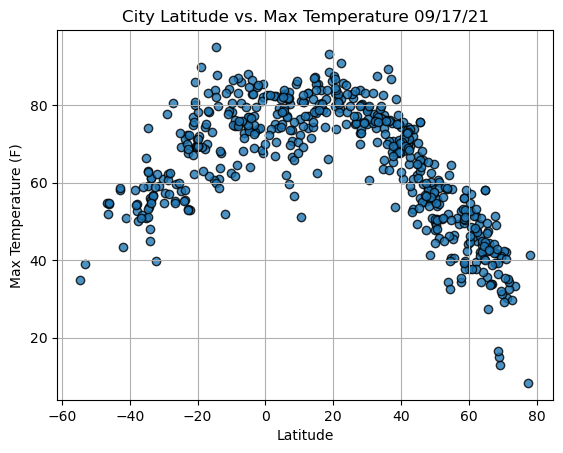

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

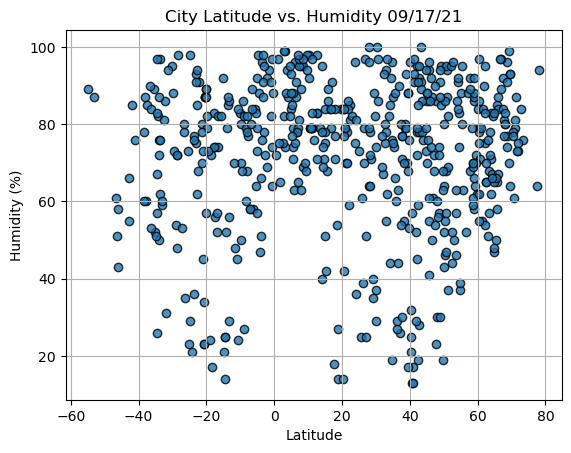

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

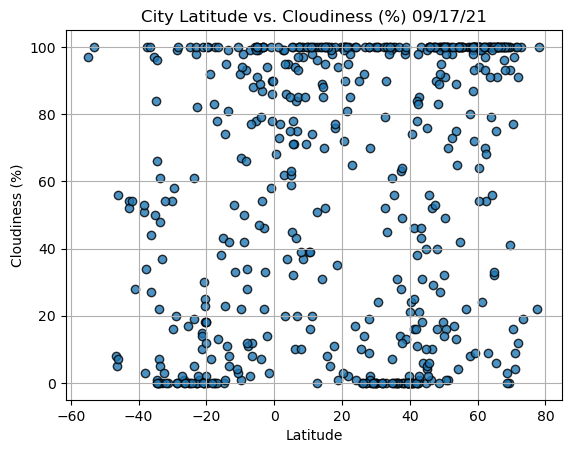

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

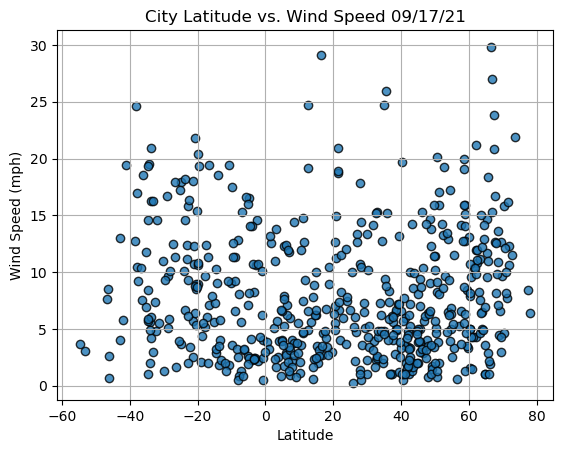

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [38]:
#6.4.2

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()



In [39]:
#Create Northern and Southern Hemisphere data frames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Jawhar,SO,2021-09-18 02:18:45,2.7809,45.5005,75.00,82,62,10.94
5,Barrow,US,2021-09-18 02:18:46,71.2906,-156.7887,30.27,87,100,7.76
6,Ilulissat,GL,2021-09-18 02:18:46,69.2167,-51.1000,12.88,70,0,6.62
7,Horta,PT,2021-09-18 02:14:07,38.5333,-28.6333,68.22,80,98,6.53
8,Inirida,CO,2021-09-18 02:16:10,3.8653,-67.9239,74.05,94,37,2.57


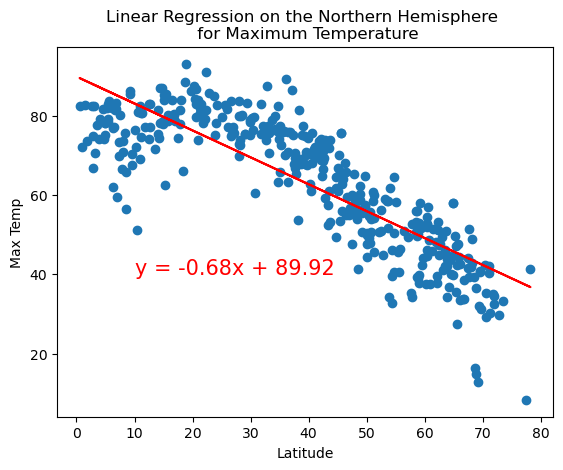

In [40]:
#Linear regression on the Northern Hemisphere (Max Temp)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (10,40))

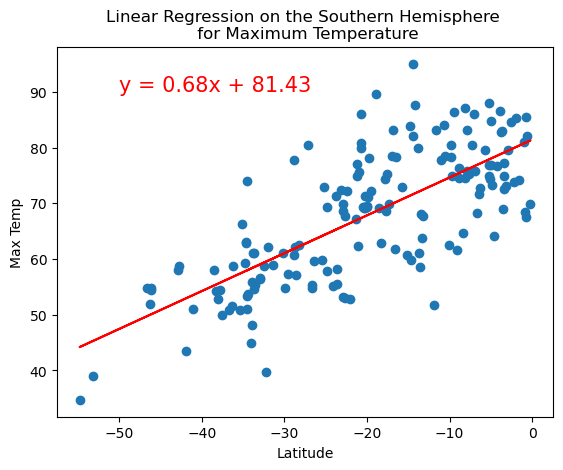

In [41]:
#Linear regression on the Southern Hemisphere (Max Temp)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (-50,90))


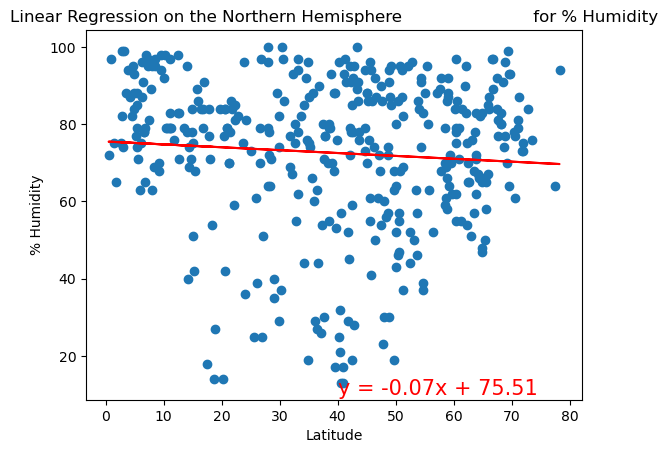

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

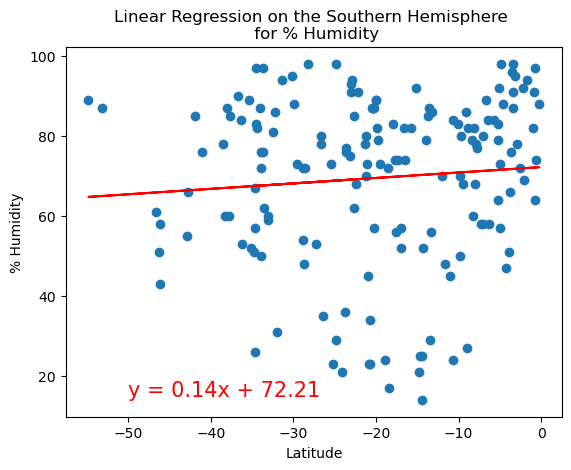

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

In [44]:
#6.4.4

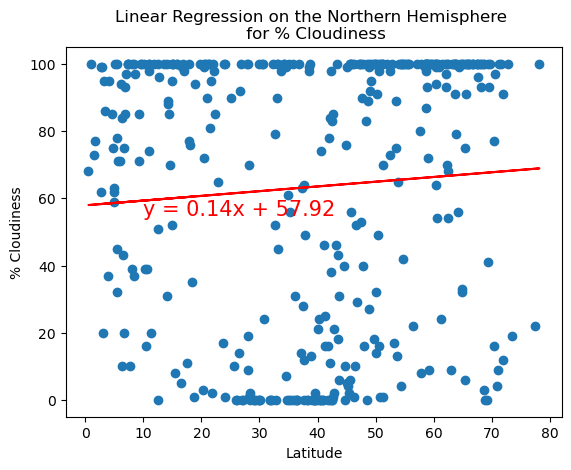

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

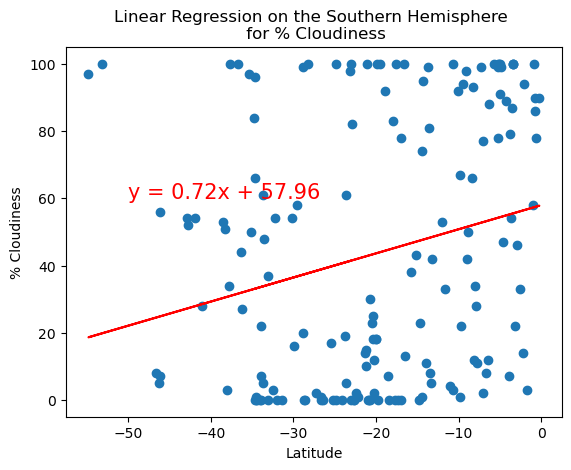

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

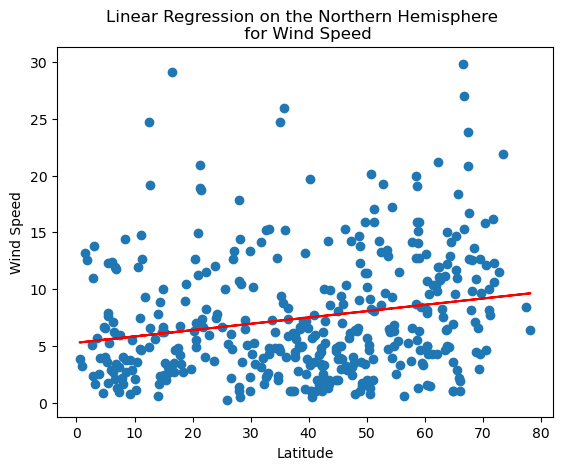

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

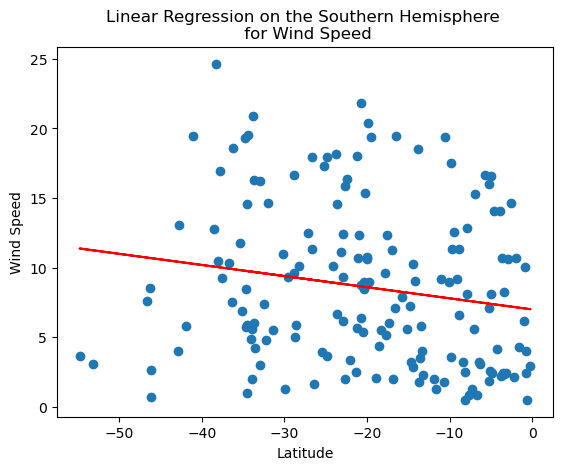

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))